<div style="background-color:#eaeffa;
            padding:25px;
            color: #28283e;
            border-radius:12px">
  <h1 style = 'color:black'>ALL Weighted Trades Evaluated</h1>
  <p style = 'color:3d3d5c'>
    Including all the weighted trades, included those which did not converge
    </p>
    
</div>

In [134]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

import json

### Reading 

In [422]:
countries = ['US', 'UK', 'FRANCE', 'GERMANY', 'SPAIN', 'ITALY', 'CANADA',
             'AUSTRALIA', 'AUSTRIA', 'CHINA', 'HK', 'JAPAN', 'SWISS',
             'SWEDEN', 'DENMARK', 'FINLAND']

COUNTRIES_EX_FOR = ['QBE INSURANCE GROUP', 'GROUPE MINOTERIES', 'SERVICE POINT SOLUTIONS']
COUNTRIES_EX_NO = ['REC SILICON', 'NORWEGIAN AIR SHUTTLE', 'SIEM OFFSHORE', 'AWILCO DRILLING']

ALL_DATA = {}

for c in countries:
    file = open(c.lower() + '_result_7.json', 'r')
    ALL_DATA[c] = json.loads(file.read())
    

### Country

In [493]:
country = 'canada'
fin = json.loads(open(country + '_result_7.json', 'r').read())

In [494]:
###### DIVISOR IS SUM OF TOTAL PARTS (SUM THE WEIGHTS, NOT LENGTH OF LIST)

fin_returns = {}

div_normal_all = 0
div_weighted_all = 0
div_basic_all = 0
div_tot_all = 0

pair_normal_all = []
pair_weighted_all = []
pair_basic_all = []

for pair in fin.keys():
#     print(div_tot)
    
    pair_normal = [W*R for W, R in fin[pair]['normal_order_returns_with_weight']\
                     if pair.split('|')[0] not in COUNTRIES_EX_FOR
                     if pair.split('|')[1] not in COUNTRIES_EX_NO]        
    pair_weighted = [W*R for W, R in fin[pair]['weighted_order_returns']\
                     if pair.split('|')[0] not in COUNTRIES_EX_FOR
                     if pair.split('|')[1] not in COUNTRIES_EX_NO]
    
    pair_basic = [W*R for W, R in fin[pair]['normal_order_returns_with_weight_basic']\
                     if pair.split('|')[0] not in COUNTRIES_EX_FOR
                     if pair.split('|')[1] not in COUNTRIES_EX_NO]
    
    pair_basic_all.extend(pair_basic)
    
    pair_normal_all.extend(pair_normal)
    pair_weighted_all.extend(pair_weighted)
    
    div_normal = sum([W for W, _ in fin[pair]['normal_order_returns_with_weight']\
                     if pair.split('|')[0] not in COUNTRIES_EX_FOR
                     if pair.split('|')[1] not in COUNTRIES_EX_NO])
    div_weighted = sum([W for W, R in fin[pair]['weighted_order_returns']\
                     if pair.split('|')[0] not in COUNTRIES_EX_FOR
                     if pair.split('|')[1] not in COUNTRIES_EX_NO])
    div_basic = sum([W for W, R in fin[pair]['normal_order_returns_with_weight_basic']\
                     if pair.split('|')[0] not in COUNTRIES_EX_FOR
                     if pair.split('|')[1] not in COUNTRIES_EX_NO])
    div_tot = div_normal + div_weighted
    
    div_normal_all += div_normal
    div_weighted_all += div_weighted
    div_basic_all += div_basic
    div_tot_all += div_tot

    assert div_tot == div_normal + div_weighted, "ERROR"
    
#     print(pair, '\n', sum(pair_normal), sum(pair_weighted), len_normal, len_tot)
    
    if div_tot == 0:
        pair_return_Anders = 0
    else:
        pair_return_Anders = (sum(pair_normal) + sum(pair_weighted)) / div_tot
    
    if div_normal == 0:
        pair_return_basic = 0
    else:
        pair_return_basic = sum(pair_normal) / div_normal
        
    if div_weighted == 0:
        pair_return_weighted = 0
    else:
        pair_return_weighted = sum(pair_weighted) / div_weighted
        
    fin_returns[pair] = {'A': pair_return_Anders,
                         'B / N': pair_return_basic,
                         'W': pair_return_weighted}
    

Anders_mean = (sum(pair_normal_all + pair_weighted_all) / div_tot_all)-0.01
Basic_mean = ((sum(pair_basic_all) / div_basic_all)-0.01)
Strategy_difference = (sum(pair_normal_all + pair_weighted_all) / div_tot_all) - (sum(pair_basic_all) / div_basic_all)
Normal_mean = (sum(pair_normal_all) / div_normal_all)-0.01
Weighted_mean = (sum(pair_weighted_all) / div_weighted_all)-0.01
Trade_difference = (sum(pair_weighted_all) / div_weighted_all) - (sum(pair_normal_all) / div_normal_all)

print('*'*12, country.upper(), '*'*15 + '\nAll returns are reported as weighted averages\n')
print(f'Anders mean: {Anders_mean:.2%}')
print(f'Basic mean: {Basic_mean:.2%}')
print(f'Strategy difference: {Strategy_difference :.2%}\n')
print(f'Weighted mean: {Weighted_mean:.2%}')
print(f'Normal mean: {Normal_mean:.2%}')
print(f'Trade difference: {Trade_difference:.2%}\n')


************ CANADA ***************
All returns are reported as weighted averages

Anders mean: 17.18%
Basic mean: 16.88%
Strategy difference: 0.31%

Weighted mean: 19.47%
Normal mean: 16.48%
Trade difference: 2.99%



In [431]:
# df_country_data = pd.DataFrame()

In [495]:
### Anders_mean, Basic_mean, Strategy_difference, Normal_mean, Weighted_mean, Trade_difference
df_country_data[country.upper()] = [Anders_mean, Basic_mean, Strategy_difference, Normal_mean, Weighted_mean, Trade_difference]

In [435]:
# df_country_data.index = ['Anders_mean', 'Basic_mean', 'Strategy_difference', 'Normal_mean',
#                          'Weighted_mean', 'Trade_difference']

In [496]:
df_country_data.T

,Anders_mean,Basic_mean,Strategy_difference,Normal_mean,Weighted_mean,Trade_difference
FINLAND,0.046010,0.036658,0.009352,0.032878,0.147901,0.115023
SWEDEN,0.067141,0.058798,0.008343,0.056703,0.097105,0.040401
DENMARK,0.290149,0.270960,0.019188,0.246666,0.449145,0.202479
HK,0.126943,0.117533,0.009411,0.110903,0.216844,0.105941
JAPAN,0.010334,0.008084,0.002250,0.010591,0.009446,-0.001145
AUSTRIA,0.207012,0.198761,0.008251,0.181895,0.385807,0.203913
AUSTRALIA,0.134113,0.128734,0.005379,0.125977,0.166889,0.040913
SWISS,0.066761,0.063939,0.002822,0.070005,0.055579,-0.014425
GERMANY,0.000834,0.001179,-0.000345,0.003410,-0.013152,-0.016561
UK,0.260367,0.218082,0.042284,0.197301,0.438855,0.241555


In [497]:
df_country_data.T.to_excel("PT_COUNTRY_DATA_2.xlsx",
             sheet_name='Sheet_1')  

### Sector

In [383]:
SALMON = ['AUSTEVOLL SEAFOOD', 'SALMAR', 'NORWAY ROYAL SALMON',
          'LEROY SEAFOOD GROUP', 'MOWI', 'GRIEG SEAFOOD',
          'BAKKAFROST']

BANK = ['TOTENS SPAREBANK', 'DNB BANK', 'GJENSIDIGE FORSIKRING',
        'SPAREBANK 1 SR-BANK', 'STOREBRAND']

TECH = ['CONTEXTVISION', 'BOUVET', 'ATEA', 'NORDIC SEMICONDUCTOR',
        'OTELLO CORPORATION', 'SCHIBSTED A', 'TECHSTEP', '']

OIL = ['PANORO ENERGY', 'AKASTOR', 'AKER BP', 'ARCHER', 'DNO', 'DOF', 'EIDSVIK OFFSHORE',
       'EQUINOR', 'HUNTER GROUP', 'PGS']

REAL_ESTATE = ['OLAV THON EIEP.', 'SELVAAG BOLIG']

INDUSTRY = ['VEIDEKKE', 'AF GRUPPEN A', 'BELSHIPS',
            'BONHEUR', 'ENSURGE MICROPOWER', 'FRONTLINE',
            'HEXAGON COMPOSITES', 'KITRON', 'KONGSBERG GRUPPEN',
            'NEKKAR', 'NRC GROUP', 'PHILLY SHIPYARD',
            'Q-FREE', 'TOMRA SYSTEMS', 'BW OFFSHORE',
            'BORREGAARD', 'NORSK HYDRO']

HEALTH_CARE = ['PHOTOCURE', 'ARCTICZYMES TECHNOLOGIES']

RENEWABLE = ['NEL', 'MAGNORA','HEXAGON COMPOSITES', 'TOMRA SYSTEMS']

In [528]:
### MIAN CODE FOR SECTOR

sector_returns = {}

div_normal_all = 0
div_weighted_all = 0
div_basic_all = 0
div_tot_all = 0

pair_normal_all = []
pair_weighted_all = []
pair_basic_all = []

for country in countries:
    for pair in ALL_DATA[country].keys():
        if (pair.split('|')[1] in RENEWABLE) & (pair.split('|')[0] not in COUNTRIES_EX_FOR):
            print(pair.split('|')[1])
    #     print(div_tot)

            pair_normal = [W*R for W, R in ALL_DATA[country][pair]['normal_order_returns_with_weight']]        
            pair_weighted = [W*R for W, R in ALL_DATA[country][pair]['weighted_order_returns']]

            pair_basic = [W*R for W, R in ALL_DATA[country][pair]['normal_order_returns_with_weight_basic']]
            pair_basic_all.extend(pair_basic)

            pair_normal_all.extend(pair_normal)
            pair_weighted_all.extend(pair_weighted)

            div_normal = sum([W for W, _ in ALL_DATA[country][pair]['normal_order_returns_with_weight']])
            div_weighted = sum([W for W, R in ALL_DATA[country][pair]['weighted_order_returns']])
            div_basic = sum([W for W, R in ALL_DATA[country][pair]['normal_order_returns_with_weight_basic']])
            div_tot = div_normal + div_weighted

            div_normal_all += div_normal
            div_weighted_all += div_weighted
            div_basic_all += div_basic
            div_tot_all += div_tot

            assert div_tot == div_normal + div_weighted, "ERROR"

        #     print(pair, '\n', sum(pair_normal), sum(pair_weighted), len_normal, len_tot)

            if div_tot == 0:
                pair_return_Anders = 0
            else:
                pair_return_Anders = (sum(pair_normal) + sum(pair_weighted)) / div_tot

            if div_normal == 0:
                pair_return_basic = 0
            else:
                pair_return_basic = sum(pair_normal) / div_normal

            if div_weighted == 0:
                pair_return_weighted = 0
            else:
                pair_return_weighted = sum(pair_weighted) / div_weighted

            sector_returns[pair] = {'A': pair_return_Anders,
                                    'B / N': pair_return_basic,
                                    'W': pair_return_weighted}


Anders_mean = (sum(pair_normal_all + pair_weighted_all) / div_tot_all)-0.01
Basic_mean = ((sum(pair_basic_all) / div_basic_all)-0.01)
Strategy_difference = (sum(pair_normal_all + pair_weighted_all) / div_tot_all) - (sum(pair_basic_all) / div_basic_all)
Normal_mean = (sum(pair_normal_all) / div_normal_all)-0.01
Weighted_mean = (sum(pair_weighted_all) / div_weighted_all)-0.01
Trade_difference = (sum(pair_weighted_all) / div_weighted_all) - (sum(pair_normal_all) / div_normal_all)

# print('*'*12, country.upper(), '*'*15 + '\nAll returns are reported as weighted averages\n')
print(f'Anders mean: {Anders_mean:.2%}')
print(f'Basic mean: {Basic_mean:.2%}')
print(f'Strategy difference: {Strategy_difference :.2%}\n')
print(f'Weighted mean: {Weighted_mean:.2%}')
print(f'Normal mean: {Normal_mean:.2%}')
print(f'Trade difference: {Trade_difference:.2%}\n')

TOMRA SYSTEMS
TOMRA SYSTEMS
TOMRA SYSTEMS
TOMRA SYSTEMS
TOMRA SYSTEMS
TOMRA SYSTEMS
TOMRA SYSTEMS
TOMRA SYSTEMS
TOMRA SYSTEMS
TOMRA SYSTEMS
NEL
TOMRA SYSTEMS
TOMRA SYSTEMS
HEXAGON COMPOSITES
MAGNORA
MAGNORA
TOMRA SYSTEMS
TOMRA SYSTEMS
TOMRA SYSTEMS
TOMRA SYSTEMS
HEXAGON COMPOSITES
TOMRA SYSTEMS
HEXAGON COMPOSITES
TOMRA SYSTEMS
Anders mean: 8.50%
Basic mean: 8.19%
Strategy difference: 0.31%

Weighted mean: 13.50%
Normal mean: 7.84%
Trade difference: 5.66%



In [499]:
# df_sector_data = pd.DataFrame()

In [529]:
### Anders_mean, Basic_mean, Strategy_difference, Normal_mean, Weighted_mean, Trade_difference
df_sector_data['RENEWABLE'] = [Anders_mean, Basic_mean, Strategy_difference, Normal_mean, Weighted_mean, Trade_difference]

In [530]:
df_sector_data.T
# df_sector_data.index = ['Anders_mean', 'Basic_mean', 'Strategy_difference', 'Normal_mean',
#                          'Weighted_mean', 'Trade_difference']

,Anders_mean,Basic_mean,Strategy_difference,Normal_mean,Weighted_mean,Trade_difference
SALMON,0.079402,0.066250,0.013152,0.057451,0.116795,0.059344
BANK,0.062521,0.065928,-0.003407,0.068660,0.032309,-0.036350
TECH,0.089349,0.079230,0.010119,0.070414,0.157408,0.086993
OIL,0.515040,0.472298,0.042742,0.448476,0.763815,0.315340
REAL_ESTATE,0.139345,0.139054,0.000291,0.137940,0.147997,0.010056
INDUSTRY,0.097546,0.082040,0.015505,0.074121,0.181822,0.107701
HEALTH_CARE,-0.248318,-0.251377,0.003059,-0.262063,-0.198014,0.064050
RENEWABLE,0.085020,0.081911,0.003109,0.078415,0.135040,0.056625


In [531]:
df_sector_data.T.to_excel("PT_SECTOR_DATA_2.xlsx",
             sheet_name='Sheet_1')  

### Aggregating (weighted means) ALL

In [539]:
div_normal_ALL = 0
div_weighted_ALL = 0
div_basic_ALL = 0
div_tot_ALL = 0

pair_normal_ALL = []
pair_weighted_ALL = []
pair_basic_ALL = []

for c in countries:
    for p in ALL_DATA[c].keys():
        
        for W, R in ALL_DATA[c][p]['normal_order_returns_with_weight']:
            pair_normal_ALL.append(W*R)
            div_normal_ALL += W
            div_tot_ALL += W
            
        for W, R in ALL_DATA[c][p]['normal_order_returns_with_weight_basic']:
            pair_basic_ALL.append(W*R)
            div_basic_ALL += W
            
        for W, R in ALL_DATA[c][p]['weighted_order_returns']:
            pair_weighted_ALL.append(W*R)
            div_weighted_ALL += W
            div_tot_ALL += W
                

In [548]:
print(f'{sum(pair_normal_ALL + pair_weighted_ALL) / div_tot_ALL-0.01:.2%}')

9.96%


In [138]:
avg_trade_normal = [ALL_DATA[c][p]['normal_order_mean'] for c in countries for p in ALL_DATA[c].keys()
                    if p.split('|')[0] not in COMP_EX_FOR
                    if p.split('|')[1] not in COMP_EX_NO]
avg_trade_weighted = [ALL_DATA[c][p]['weighted_order_mean'] for c in countries for p in ALL_DATA[c].keys()
                    if p.split('|')[0] not in COMP_EX_FOR
                    if p.split('|')[1] not in COMP_EX_NO]

avg_trade_normal_2 = [ALL_DATA[c][p]['normal_order_mean'] - 0.01 for c in countries for p in ALL_DATA[c].keys()
                    if p.split('|')[0] not in COMP_EX_FOR
                    if p.split('|')[1] not in COMP_EX_NO]
avg_trade_weighted_2 = [ALL_DATA[c][p]['weighted_order_mean'] - 0.01 for c in countries for p in ALL_DATA[c].keys()
                    if p.split('|')[0] not in COMP_EX_FOR
                    if p.split('|')[1] not in COMP_EX_NO]

### removing outlier
avg_trade_weighted_3 = [p for p in avg_trade_weighted_2 if p < 2]

weighted = pd.DataFrame(avg_trade_weighted)
weighted.columns = ['weighted']
normal = pd.DataFrame(avg_trade_normal)
normal.columns = ['normal']

all_trades = pd.concat([weighted, normal], axis=1)

print(f'mean normal trade: {np.mean(avg_trade_normal) - 0.01:.2%}')
print(f'mean weighted trade: {np.mean(avg_trade_weighted) - 0.01:.2%}')
print(f'Difference: {np.mean(avg_trade_weighted) - np.mean(avg_trade_normal):.2%}')

mean normal trade: 6.97%
mean weighted trade: 8.59%
Difference: 1.62%


### Aggregating (pure returns)

In [557]:
pair_normal_ALL_return_list = []
pair_weighted_ALL_return_list = []
pair_basic_ALL_return_list = []
pair_Anders_ALL_return_list = []

for c in countries:
    for p in ALL_DATA[c].keys():
        
        for _, R in ALL_DATA[c][p]['normal_order_returns_with_weight']:
            pair_normal_ALL_return_list.append(R)
            pair_Anders_ALL_return_list.append(R)

        for _, R in ALL_DATA[c][p]['weighted_order_returns']:
            pair_weighted_ALL_return_list.append(R)
            pair_Anders_ALL_return_list.append(R)
            
        for _, R in ALL_DATA[c][p]['normal_order_returns_with_weight_basic']:
            pair_basic_ALL_return_list.append(R)
            

### Aggregating (weighted means) for each strategy run

In [786]:
###### DIVISOR IS SUM OF TOTAL PARTS (SUM THE WEIGHTS, NOT LENGTH OF LIST)

returns = {}

pair_Anders_all_sequrities = []
pair_normal_all_sequrities = []
pair_weighted_all_sequrities = []
pair_basic_all_sequrities = []

for c in countries:
    for pair in ALL_DATA[c].keys():
    
        pair_normal = [W*R for W, R in ALL_DATA[c][pair]['normal_order_returns_with_weight']\
                         if pair.split('|')[0] not in COUNTRIES_EX_FOR
                         if pair.split('|')[1] not in COUNTRIES_EX_NO]        
        pair_weighted = [W*R for W, R in ALL_DATA[c][pair]['weighted_order_returns']\
                         if pair.split('|')[0] not in COUNTRIES_EX_FOR
                         if pair.split('|')[1] not in COUNTRIES_EX_NO]

        pair_basic = [W*R for W, R in ALL_DATA[c][pair]['normal_order_returns_with_weight_basic']\
                         if pair.split('|')[0] not in COUNTRIES_EX_FOR
                         if pair.split('|')[1] not in COUNTRIES_EX_NO]


        div_normal = sum([W for W, _ in ALL_DATA[c][pair]['normal_order_returns_with_weight']\
                         if pair.split('|')[0] not in COUNTRIES_EX_FOR
                         if pair.split('|')[1] not in COUNTRIES_EX_NO])
        div_weighted = sum([W for W, R in ALL_DATA[c][pair]['weighted_order_returns']\
                         if pair.split('|')[0] not in COUNTRIES_EX_FOR
                         if pair.split('|')[1] not in COUNTRIES_EX_NO])
        div_basic = sum([W for W, R in ALL_DATA[c][pair]['normal_order_returns_with_weight_basic']\
                         if pair.split('|')[0] not in COUNTRIES_EX_FOR
                         if pair.split('|')[1] not in COUNTRIES_EX_NO])
        div_total = div_normal + div_weighted

        if div_total == 0:
            pair_return_Anders = 0
        else:
            pair_return_Anders = (sum(pair_normal) + sum(pair_weighted)) / div_total
            
        if div_basic == 0:
            pair_return_basic = 0
        else:
            pair_return_basic = sum(pair_basic) / div_basic

        if div_normal == 0:
            pair_return_normal = 0
        else:
            pair_return_normal = sum(pair_normal) / div_normal

        if div_weighted == 0:
            pair_return_weighted = 0
        else:
            pair_return_weighted = sum(pair_weighted) / div_weighted
        
        if pair_return_Anders == 0:
            pair_Anders_all_sequrities.append(pair_return_Anders)
        else:
            pair_Anders_all_sequrities.append(pair_return_Anders-0.01)
        
        if pair_return_weighted == 0:
            pair_weighted_all_sequrities.append(pair_return_weighted)
        else:
            pair_weighted_all_sequrities.append(pair_return_weighted-0.01)
        if pair_return_basic == 0:
            pair_basic_all_sequrities.append(pair_return_basic)
        else:
            pair_basic_all_sequrities.append(pair_return_basic-0.01)
        if pair_return_normal == 0:
            pair_normal_all_sequrities.append(pair_return_normal)
        else:
            pair_normal_all_sequrities.append(pair_return_normal-0.01)
    
pair_Anders_all_sequrities = pd.Series(pair_Anders_all_sequrities)
pair_weighted_all_sequrities = pd.Series(pair_weighted_all_sequrities)
pair_basic_all_sequrities = pd.Series(pair_basic_all_sequrities)
pair_normal_all_sequrities = pd.Series(pair_normal_all_sequrities)

In [809]:
# np.median(pair_Anders_all_sequrities[pair_Anders_all_sequrities !=0])
np.median(pair_Anders_all_sequrities[pair_Anders_all_sequrities !=0])

0.10904866515125371

In [810]:
9.96 - 0.10179093044550748

0.007257734705746227

### percentage positive, negative, neutral

In [788]:
pd.Series(np.select([pair_Anders_all_sequrities > 0,
           pair_Anders_all_sequrities == 0,
           pair_Anders_all_sequrities < 0], ['positiv', 'neutral', 'negative'])).value_counts(normalize=True)

positiv     0.50939
negative    0.27230
neutral     0.21831
dtype: float64

In [789]:
pd.Series(np.select([pair_basic_all_sequrities > 0,
           pair_basic_all_sequrities == 0,
           pair_basic_all_sequrities < 0], ['positiv', 'neutral', 'negative'])).value_counts(normalize=True)

positiv     0.507042
negative    0.274648
neutral     0.218310
dtype: float64

In [790]:
### Exclude neutral for trades investigation
pd.Series(np.select([pair_weighted_all_sequrities > 0,
           pair_weighted_all_sequrities == 0,
           pair_weighted_all_sequrities < 0], ['positiv', 'neutral', 'negative'])).value_counts(normalize=True)

neutral     0.406103
positiv     0.382629
negative    0.211268
dtype: float64

In [791]:
### Exclude neutral for trades investigation
pd.Series(np.select([pair_normal_all_sequrities > 0,
           pair_normal_all_sequrities == 0,
           pair_normal_all_sequrities < 0], ['positiv', 'neutral', 'negative'])).value_counts(normalize=True)

positiv     0.492958
negative    0.281690
neutral     0.225352
dtype: float64

In [622]:
### Anders
px.bar(sorted(pair_Anders_all_sequrities[pair_Anders_all_sequrities < 4]))

In [793]:
fig = go.Figure()
# fig.add_bar(y = sorted(avg_trade_p_basic_2), marker_color='#ff6666')
fig.add_bar(y = sorted(pair_Anders_all_sequrities[pair_Anders_all_sequrities < 4]), marker_color='#6666ff')




fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,        # hide grid x-lines
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)'
        ),
        
    ),
    yaxis=dict(
        showgrid=False,
        gridcolor = 'rgb(204, 204, 204)',
        gridwidth = 1,
        zeroline=False,
        showline=True,
        showticklabels=True
    ),
#     autosize=False,
    showlegend=False,
    plot_bgcolor='white'

)

fig.add_vrect(x0=210, x1=len(pair_Anders_all_sequrities), 
              annotation_text="Positive returns", annotation_position="top left",
              fillcolor='#6666ff', opacity=0.12, line_width=0,
              annotation_font_size=18,
              annotation_font_color='#404040')
fig.add_vrect(x0=0, x1=115, 
              annotation_text="Negative returns", annotation_position="top left",
              fillcolor='#ff6666', opacity=0.12, line_width=0,
              annotation_font_size=18,
              annotation_font_color='#404040')


fig.update_layout(height=600)
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

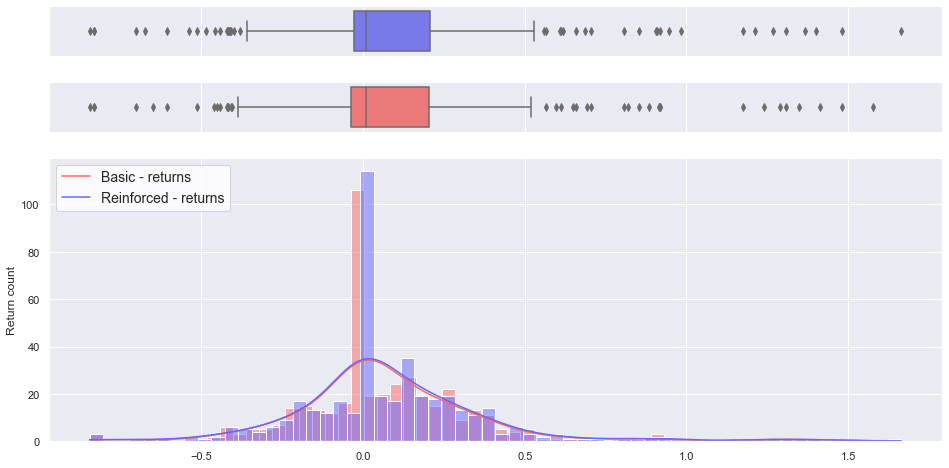

In [794]:
sns.set(rc={'figure.figsize': (16,8)})
sns.set_style("darkgrid")

c_1 = '#ff6666'
c_2 = '#6666ff'

f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})

sns.boxplot(x = pair_Anders_all_sequrities[pair_Anders_all_sequrities<2], ax = ax_box1, color = c_2)
# sns.swarmplot(x = avg_trade_p_Anders_2, ax = ax_box1)
sns.boxplot(x = pair_basic_all_sequrities[pair_basic_all_sequrities<2], ax = ax_box2, color = c_1)


sns.histplot(x = pair_basic_all_sequrities[pair_basic_all_sequrities<2], bins=60,ax=ax_hist, kde=True, color = c_1).set_ylabel('Return count')
sns.histplot(x = pair_Anders_all_sequrities[pair_Anders_all_sequrities<2], bins=60, ax=ax_hist, kde=True, color = c_2)

# sns.despine(left=True)
# sns.despine(bottom=True, left=True, ax=ax_box1)
# sns.despine(bottom=True, left=True, ax=ax_box2)

plt.legend(title = '', loc=2, fontsize = 14, labels = ['Basic - returns', 'Reinforced - returns']).\
                                                get_frame().set_facecolor('white')
plt.savefig('strategy_return_subplot', bbox_inches='tight', pad_inches = 0.3)
plt.show()

In [800]:
from scipy.stats import skew, kurtosis
skew(pair_basic_all_sequrities)
# skew(pair_basic_all_sequrities[pair_basic_all_sequrities<2])
# kurtosis(pair_Anders_all_sequrities)
# kurtosis(pair_basic_all_sequrities[pair_basic_all_sequrities<2])

1.338734939985778

In [603]:
### Basic
px.bar(sorted(pair_basic_all_sequrities))

In [611]:
### Weighted
px.bar(sorted(pair_weighted_all_sequrities[pair_weighted_all_sequrities < 2]))

In [605]:
### Weighted
px.bar(sorted(pair_normal_all_sequrities))

### Plotting

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

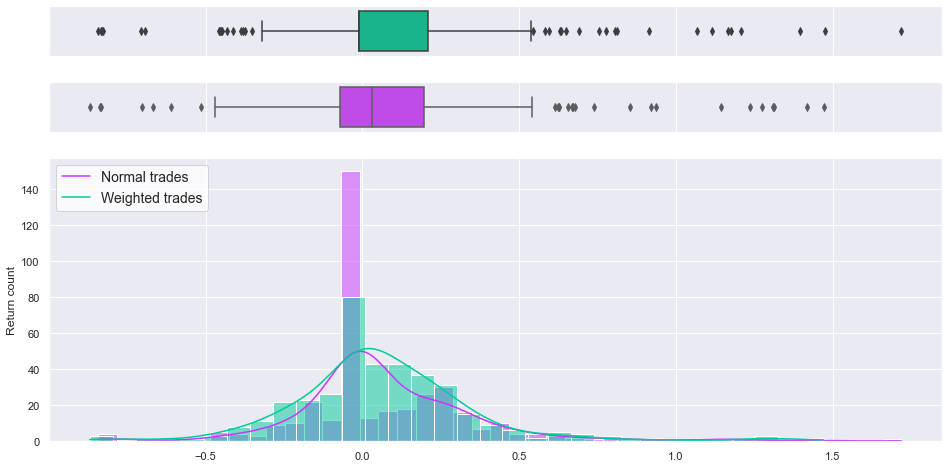

In [146]:
sns.set(rc={'figure.figsize': (16,8)})
sns.set_style("darkgrid")

c_1 = '#cc33ff'
c_2 = '#00cc99'

f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})

sns.boxplot(x = avg_trade_weighted_3, ax = ax_box1, color = c_2)
# sns.swarmplot(x = avg_trade_p_Anders_2, ax = ax_box1)
sns.boxplot(x = avg_trade_normal_2, ax = ax_box2, color = c_1)


sns.histplot(x = avg_trade_weighted_3, ax=ax_hist, kde=True, color = c_1).set_ylabel('Return count')
sns.histplot(x = avg_trade_normal_2, ax=ax_hist, kde=True, color = c_2)

# sns.despine(left=True)
# sns.despine(bottom=True, left=True, ax=ax_box1)
# sns.despine(bottom=True, left=True, ax=ax_box2)

plt.legend(title = '', loc=2, fontsize = 14, labels = ['Normal trades', 'Weighted trades']).\
                                                get_frame().set_facecolor('white')
plt.savefig('strategy_return_subplot', bbox_inches='tight', pad_inches = 0.3)
plt.show()

### Fundamental

In [725]:
EQT = 'WAWI'
file = open('7_' + EQT + '.json', 'r')
data_fund = json.loads(file.read())
data_fund.keys()

dict_keys(['DFDS|WALLENIUS WILHELMSEN'])

In [726]:
###### DIVISOR IS SUM OF TOTAL PARTS (SUM THE WEIGHTS, NOT LENGTH OF LIST)

fund_returns = {}

div_normal_all = 0
div_weighted_all = 0
div_basic_all = 0
div_tot_all = 0

pair_normal_all = []
pair_weighted_all = []
pair_basic_all = []

for pair in data_fund.keys():
#     print(pair)
    
    pair_normal = [W*R for W, R in data_fund[pair]['normal_order_returns_with_weight']\
                     if pair.split('|')[0] not in COUNTRIES_EX_FOR
                     if pair.split('|')[1] not in COUNTRIES_EX_NO]        
    pair_weighted = [W*R for W, R in data_fund[pair]['weighted_order_returns']\
                     if pair.split('|')[0] not in COUNTRIES_EX_FOR
                     if pair.split('|')[1] not in COUNTRIES_EX_NO]
    
    pair_basic = [W*R for W, R in data_fund[pair]['normal_order_returns_with_weight_basic']\
                     if pair.split('|')[0] not in COUNTRIES_EX_FOR
                     if pair.split('|')[1] not in COUNTRIES_EX_NO]
    
    pair_basic_all.extend(pair_basic)
    
    pair_normal_all.extend(pair_normal)
    pair_weighted_all.extend(pair_weighted)
    
    div_normal = sum([W for W, _ in data_fund[pair]['normal_order_returns_with_weight']\
                     if pair.split('|')[0] not in COUNTRIES_EX_FOR
                     if pair.split('|')[1] not in COUNTRIES_EX_NO])
    div_weighted = sum([W for W, R in data_fund[pair]['weighted_order_returns']\
                     if pair.split('|')[0] not in COUNTRIES_EX_FOR
                     if pair.split('|')[1] not in COUNTRIES_EX_NO])
    div_basic = sum([W for W, R in data_fund[pair]['normal_order_returns_with_weight_basic']\
                     if pair.split('|')[0] not in COUNTRIES_EX_FOR
                     if pair.split('|')[1] not in COUNTRIES_EX_NO])
    div_tot = div_normal + div_weighted
    
    div_normal_all += div_normal
    div_weighted_all += div_weighted
    div_basic_all += div_basic
    div_tot_all += div_tot

    
#     print(pair, '\n', sum(pair_normal), sum(pair_weighted), len_normal, len_tot)
    
    if div_tot == 0:
        pair_return_Anders = 0
    else:
        pair_return_Anders = (sum(pair_normal) + sum(pair_weighted)) / div_tot
    
    if div_normal == 0:
        pair_return_basic = 0
    else:
        pair_return_basic = sum(pair_normal) / div_normal
        
    if div_weighted == 0:
        pair_return_weighted = 0
    else:
        pair_return_weighted = sum(pair_weighted) / div_weighted
        
    fin_returns[pair] = {'A': pair_return_Anders,
                         'B / N': pair_return_basic,
                         'W': pair_return_weighted}
    

Anders_mean_fund = (sum(pair_normal_all + pair_weighted_all) / div_tot_all)-0.01
Basic_mean_fund = ((sum(pair_basic_all) / div_basic_all)-0.01)
Strategy_difference_fund = (sum(pair_normal_all + pair_weighted_all) / div_tot_all) - (sum(pair_basic_all) / div_basic_all)
Normal_mean_fund = (sum(pair_normal_all) / div_normal_all)-0.01
if div_weighted_all == 0:
    Weighted_mean_fund = 0
    Trade_difference_fund = 0
else:
    Weighted_mean_fund = (sum(pair_weighted_all) / div_weighted_all)-0.01
    Trade_difference_fund = (sum(pair_weighted_all) / div_weighted_all) - (sum(pair_normal_all) / div_normal_all)

print('*'*12, EQT.upper(), '*'*15 + '\nAll returns are reported as weighted averages\n')
print(f'Anders mean: {Anders_mean_fund:.2%}')
print(f'Basic mean: {Basic_mean_fund:.2%}')
print(f'Strategy difference: {Strategy_difference_fund :.2%}\n')
print(f'Weighted mean: {Weighted_mean_fund:.2%}')
print(f'Normal mean: {Normal_mean_fund:.2%}')
print(f'Trade difference: {Trade_difference_fund:.2%}\n')


************ WAWI ***************
All returns are reported as weighted averages

Anders mean: 88.13%
Basic mean: 89.27%
Strategy difference: -1.15%

Weighted mean: 61.76%
Normal mean: 90.52%
Trade difference: -28.77%



In [632]:
# df_fund_data = pd.DataFrame()

In [727]:
df_fund_data[EQT] = [Anders_mean_fund, Basic_mean_fund, Strategy_difference_fund,
                     Normal_mean_fund, Weighted_mean_fund, Trade_difference_fund]

In [636]:
# df_fund_data.index = ['Anders_mean', 'Basic_mean', 'Strategy_difference', 'Normal_mean',
#                          'Weighted_mean', 'Trade_difference']

In [728]:
df_fund_data.T

,Anders_mean,Basic_mean,Strategy_difference,Normal_mean,Weighted_mean,Trade_difference
EQUINOR,-0.122073,-0.122426,0.000353,-0.122820,-0.115687,0.007133
DNB,-0.242863,-0.238600,-0.004263,-0.235688,-0.285912,-0.050225
TELENOR,0.025028,0.019366,0.005662,0.013165,0.138911,0.125746
HYDRO,0.058357,0.080308,-0.021951,0.100064,-0.275300,-0.375363
AKERBP,0.173209,0.173209,0.000000,0.173209,0.000000,0.000000
YARA,0.389493,0.389493,0.000000,0.389493,0.000000,0.000000
GJENSIDIGE,0.101965,0.093137,0.008828,0.080905,0.179002,0.098096
ORKLA,-0.015213,-0.017867,0.002654,-0.021020,0.030011,0.051031
SCHIBSTED_A,0.170309,0.180231,-0.009922,0.182972,0.151978,-0.030995
AF_GRUPPEN,-0.173968,-0.162219,-0.011749,-0.151914,-0.249777,-0.097862


In [729]:
df_fund_data.T.to_excel("PT_FUNDAMENTAL_DATA_2.xlsx",
             sheet_name='Sheet_1')  

In [821]:
sum_ = 0

for p in ALL_DATA['DENMARK'].keys():
    sum_ += len(ALL_DATA['DENMARK'][p]['weighted_order_returns'])
sum_

37

In [ ]:
countries = ['US', 'UK', 'FRANCE', 'GERMANY', 'SPAIN', 'ITALY', 'CANADA',
             'AUSTRALIA', 'AUSTRIA', 'CHINA', 'HK', 'JAPAN', 'SWISS',
             'SWEDEN', 'DENMARK', 'FINLAND']